## OD data Analysis:
* In this notebook, I'm going to start analyzing OD Data and looking for any changes in patterns/trends in the 6 month period from December 2019 - May 2020 compared to the average trends we see over the last 4 years.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np


In [2]:
od_df = pd.read_csv('../data/data_clean/od_data_longterm.csv')
od_df

,Date,State,Opioid Deaths,Number of Deaths,Number of Drug Overdose Deaths
0,2015-01-01,AK,NaN,4034.0,126.0
1,2015-02-01,AK,NaN,4084.0,127.0
2,2015-03-01,AK,NaN,4101.0,125.0
3,2015-04-01,AK,NaN,4133.0,126.0
4,2015-05-01,AK,NaN,4196.0,125.0
...,...,...,...,...,...
3245,2020-01-01,WY,47.0,4748.0,78.0
3246,2020-02-01,WY,46.0,4783.0,80.0
3247,2020-03-01,WY,45.0,4757.0,81.0
3248,2020-04-01,WY,46.0,4828.0,83.0


In [3]:
od_df['State'].nunique()

50

In [4]:
od_df['State'].unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI',
       'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV',
       'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

##### What percentage of total deaths are attributed to overdose? 
per death = number of drug overdose deaths / total number of deaths 

In [5]:
per_death = od_df['Number of Drug Overdose Deaths']/od_df['Number of Deaths']*100
od_df['%_death'] = per_death
od_df

,Date,State,Opioid Deaths,Number of Deaths,Number of Drug Overdose Deaths,%_death
0,2015-01-01,AK,NaN,4034.0,126.0,3.123451
1,2015-02-01,AK,NaN,4084.0,127.0,3.109696
2,2015-03-01,AK,NaN,4101.0,125.0,3.048037
3,2015-04-01,AK,NaN,4133.0,126.0,3.048633
4,2015-05-01,AK,NaN,4196.0,125.0,2.979028
...,...,...,...,...,...,...
3245,2020-01-01,WY,47.0,4748.0,78.0,1.642797
3246,2020-02-01,WY,46.0,4783.0,80.0,1.672590
3247,2020-03-01,WY,45.0,4757.0,81.0,1.702754
3248,2020-04-01,WY,46.0,4828.0,83.0,1.719138


These numbers are ugly and big, lets round them out:


In [6]:
od_df['%_death'] = od_df['%_death'].round(decimals = 2)
od_df

,Date,State,Opioid Deaths,Number of Deaths,Number of Drug Overdose Deaths,%_death
0,2015-01-01,AK,NaN,4034.0,126.0,3.12
1,2015-02-01,AK,NaN,4084.0,127.0,3.11
2,2015-03-01,AK,NaN,4101.0,125.0,3.05
3,2015-04-01,AK,NaN,4133.0,126.0,3.05
4,2015-05-01,AK,NaN,4196.0,125.0,2.98
...,...,...,...,...,...,...
3245,2020-01-01,WY,47.0,4748.0,78.0,1.64
3246,2020-02-01,WY,46.0,4783.0,80.0,1.67
3247,2020-03-01,WY,45.0,4757.0,81.0,1.70
3248,2020-04-01,WY,46.0,4828.0,83.0,1.72


#### How has this percentage changed over time?

In [7]:
od_df['Date'] = pd.to_datetime(od_df['Date'])

In [8]:
od_df['Year'] = pd.DatetimeIndex(od_df['Date']).year
od_df

,Date,State,Opioid Deaths,Number of Deaths,Number of Drug Overdose Deaths,%_death,Year
0,2015-01-01,AK,NaN,4034.0,126.0,3.12,2015
1,2015-02-01,AK,NaN,4084.0,127.0,3.11,2015
2,2015-03-01,AK,NaN,4101.0,125.0,3.05,2015
3,2015-04-01,AK,NaN,4133.0,126.0,3.05,2015
4,2015-05-01,AK,NaN,4196.0,125.0,2.98,2015
...,...,...,...,...,...,...,...
3245,2020-01-01,WY,47.0,4748.0,78.0,1.64,2020
3246,2020-02-01,WY,46.0,4783.0,80.0,1.67,2020
3247,2020-03-01,WY,45.0,4757.0,81.0,1.70,2020
3248,2020-04-01,WY,46.0,4828.0,83.0,1.72,2020


<AxesSubplot:title={'center':'Fatal Overdose Rate Trends Over Time'}, xlabel='Year', ylabel='Percent of deaths caused by overdose'>

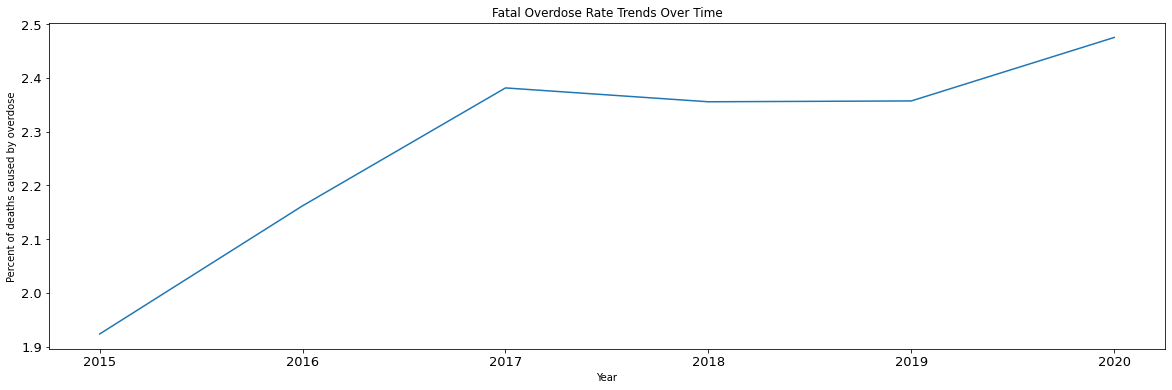

In [9]:
mena_rate4yr = od_df.reset_index()
mean_rate4yr = od_df.groupby('Year')['%_death'].mean()
mean_rate4yr.plot(kind='line', figsize=(20,6),markersize=8,title='Fatal Overdose Rate Trends Over Time',xlabel='Year',ylabel='Percent of deaths caused by overdose',fontsize=13) 

##### Is there a difference between in the percentage of deaths in the first 5 months of 2020 and the same period in 2019?  ie Jan-May 2019 and Jan-May 2020 
Steps: 
1. Make the dates column so I can see the monthly totals side by side 
2. Visualize data 

In [10]:
sub1_filter = ['State','Date','%_death']
sub1 = od_df[sub1_filter]
sub1

,State,Date,%_death
0,AK,2015-01-01,3.12
1,AK,2015-02-01,3.11
2,AK,2015-03-01,3.05
3,AK,2015-04-01,3.05
4,AK,2015-05-01,2.98
...,...,...,...
3245,WY,2020-01-01,1.64
3246,WY,2020-02-01,1.67
3247,WY,2020-03-01,1.70
3248,WY,2020-04-01,1.72


In [11]:
sub1['Date'] = pd.to_datetime(sub1['Date'])
df_2019 = sub1[sub1['Date'].dt.year == 2019]
df_2020 = sub1[sub1['Date'].dt.year == 2020]


In [12]:
test = df_2019['State'] == 'AK'
df_2019_test = df_2019[test]
df_2019_test

,State,Date,%_death
48,AK,2019-01-01,2.46
49,AK,2019-02-01,2.62
50,AK,2019-03-01,2.79
51,AK,2019-04-01,2.70
52,AK,2019-05-01,2.87
53,AK,2019-06-01,2.92
54,AK,2019-07-01,3.02
55,AK,2019-08-01,2.92
56,AK,2019-09-01,3.04
57,AK,2019-10-01,3.26


In [13]:
df_2019['Month'] = pd.DatetimeIndex(df_2019['Date']).month
month_filter = df_2019['Month']<6
df_2019 = df_2019[month_filter]
df_2019.head(10)

,State,Date,%_death,Month
48,AK,2019-01-01,2.46,1
49,AK,2019-02-01,2.62,2
50,AK,2019-03-01,2.79,3
51,AK,2019-04-01,2.70,4
52,AK,2019-05-01,2.87,5
113,AL,2019-01-01,1.38,1
114,AL,2019-02-01,1.34,2
115,AL,2019-03-01,1.33,3
116,AL,2019-04-01,1.33,4
117,AL,2019-05-01,1.33,5


In [14]:
df_2019['Date'] = pd.to_datetime(df_2019['Date'])
df_2019['Month'] = df_2019['Date'].dt.strftime('%b')
df_2019

,State,Date,%_death,Month
48,AK,2019-01-01,2.46,Jan
49,AK,2019-02-01,2.62,Feb
50,AK,2019-03-01,2.79,Mar
51,AK,2019-04-01,2.70,Apr
52,AK,2019-05-01,2.87,May
...,...,...,...,...
3233,WY,2019-01-01,1.29,Jan
3234,WY,2019-02-01,1.28,Feb
3235,WY,2019-03-01,1.37,Mar
3236,WY,2019-04-01,1.34,Apr


In [15]:
df_2020.to_csv('../data/data_clean/od_mon_as_nums.csv')

## New format to export 

In [16]:
t = {'state_ave':df_2020.groupby('State')['%_death'].mean()}
trends_pd = pd.DataFrame(t)
trends_pd.to_csv('../data/data_clean/trends.csv',index=True)

In [17]:
df_2020

,State,Date,%_death
60,AK,2020-01-01,2.95
61,AK,2020-02-01,2.75
62,AK,2020-03-01,2.60
63,AK,2020-04-01,2.66
64,AK,2020-05-01,2.84
...,...,...,...
3245,WY,2020-01-01,1.64
3246,WY,2020-02-01,1.67
3247,WY,2020-03-01,1.70
3248,WY,2020-04-01,1.72


In [18]:
df_2020['Month'] = pd.DatetimeIndex(df_2020['Date']).month
df_2020['Month'] = df_2020['Date'].dt.strftime('%b')

In [19]:
compare_df = df_2019.merge(df_2020, on=['State','Month'],how = 'outer')
compare_df['Month']

0      Jan
1      Feb
2      Mar
3      Apr
4      May
      ... 
245    Jan
246    Feb
247    Mar
248    Apr
249    May
Name: Month, Length: 250, dtype: object

In [20]:
test = compare_df['State'] == 'AK'
compare_df_test = compare_df[test]
compare_df_test

,State,Date_x,%_death_x,Month,Date_y,%_death_y
0,AK,2019-01-01,2.46,Jan,2020-01-01,2.95
1,AK,2019-02-01,2.62,Feb,2020-02-01,2.75
2,AK,2019-03-01,2.79,Mar,2020-03-01,2.60
3,AK,2019-04-01,2.70,Apr,2020-04-01,2.66
4,AK,2019-05-01,2.87,May,2020-05-01,2.84


In [21]:
compare_df  = compare_df.rename(columns={'Date_x':'2019',
                          'Date_y':'2020',
                          '%_death_x':'2019_rate',
                          '%_death_y': '2020_rate'})

In [22]:
compare_df['%_dif'] = compare_df['2020_rate'] - compare_df['2019_rate']
compare_df

,State,2019,2019_rate,Month,2020,2020_rate,%_dif
0,AK,2019-01-01,2.46,Jan,2020-01-01,2.95,0.49
1,AK,2019-02-01,2.62,Feb,2020-02-01,2.75,0.13
2,AK,2019-03-01,2.79,Mar,2020-03-01,2.60,-0.19
3,AK,2019-04-01,2.70,Apr,2020-04-01,2.66,-0.04
4,AK,2019-05-01,2.87,May,2020-05-01,2.84,-0.03
...,...,...,...,...,...,...,...
245,WY,2019-01-01,1.29,Jan,2020-01-01,1.64,0.35
246,WY,2019-02-01,1.28,Feb,2020-02-01,1.67,0.39
247,WY,2019-03-01,1.37,Mar,2020-03-01,1.70,0.33
248,WY,2019-04-01,1.34,Apr,2020-04-01,1.72,0.38


<AxesSubplot:title={'center':'Year Over Year Comparison of 2019 and 2020 Overdose Rates'}, xlabel='Month', ylabel='Percent of deaths caused by overdose'>

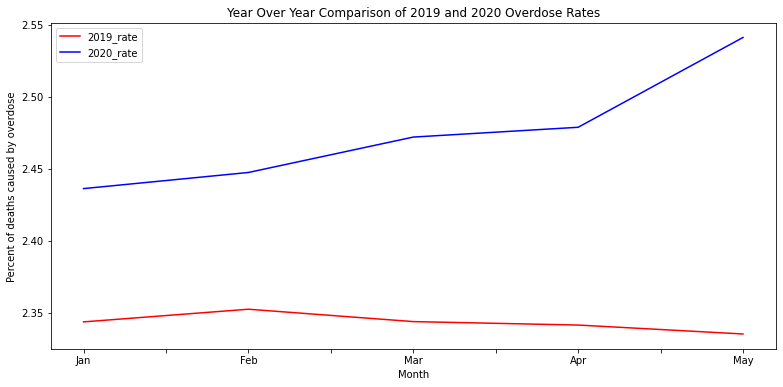

In [23]:
order = ['Jan', 'Feb', 'Mar','Apr','May']
compare_df.groupby('Month')['2019_rate'].mean().loc[order].plot(kind = 'line', color='red',figsize=(13,6),ylabel='Percent of deaths caused by overdose',title='Year Over Year Comparison of 2019 and 2020 Overdose Rates',legend=True)
compare_df.groupby('Month')['2020_rate'].mean().loc[order].plot(kind = 'line', color='blue',legend=True)


We can tell that the percentage of deaths attributed to overdose is higher overall in 2020 than 2019, and there it is trending upwards, whereas 2019 is trending downwards

In [24]:
compare_cols = ['State','Month','2019_rate','2020_rate','%_dif']
compare_years_df = compare_df[compare_cols]
compare_years_df

,State,Month,2019_rate,2020_rate,%_dif
0,AK,Jan,2.46,2.95,0.49
1,AK,Feb,2.62,2.75,0.13
2,AK,Mar,2.79,2.60,-0.19
3,AK,Apr,2.70,2.66,-0.04
4,AK,May,2.87,2.84,-0.03
...,...,...,...,...,...
245,WY,Jan,1.29,1.64,0.35
246,WY,Feb,1.28,1.67,0.39
247,WY,Mar,1.37,1.70,0.33
248,WY,Apr,1.34,1.72,0.38


In [25]:
compare_years_df.to_csv('../data/data_clean/change_OD_2019_to_2020.csv',index=False)

#### Looking at state by state data - how does the percent difference change over time?

<AxesSubplot:xlabel='State'>

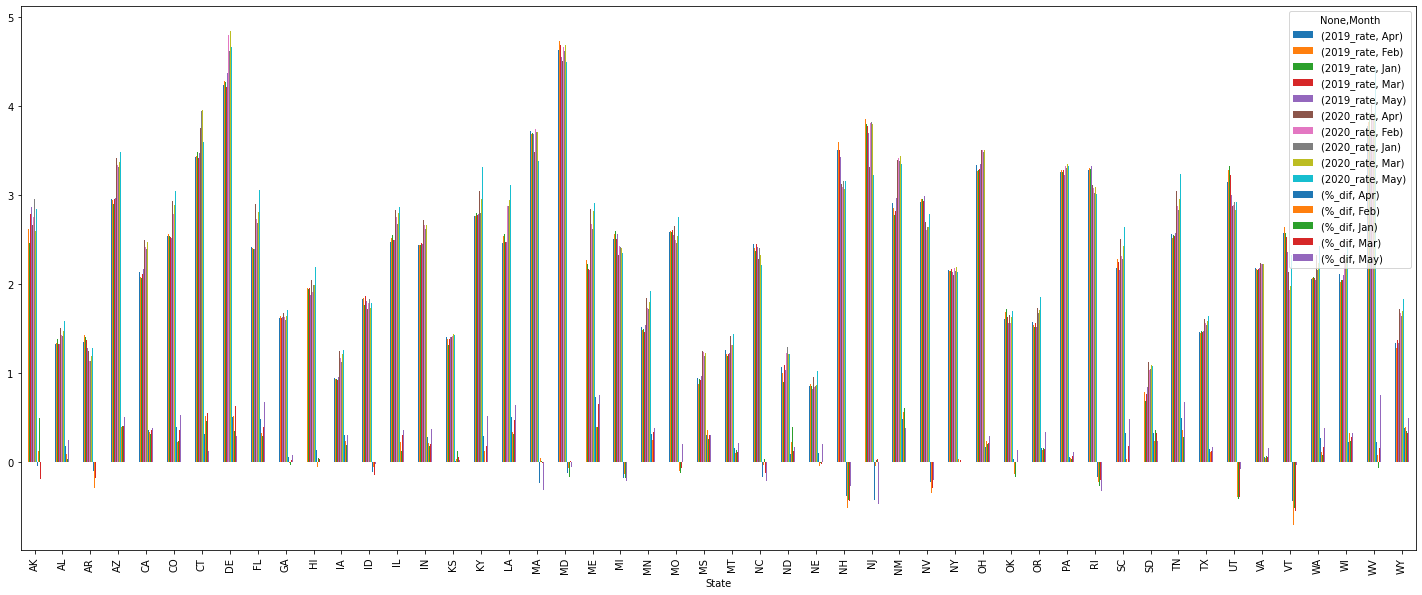

In [26]:
compare_years_df1 = compare_years_df.set_index(['State','Month'])
compare_years_df1.unstack().plot(kind='bar',figsize=(25,10))

In [27]:
Jan = compare_df[compare_years_df['Month'] == 'Jan']
Feb = compare_df[compare_years_df['Month'] == 'Feb']
Mar = compare_df[compare_years_df['Month'] == 'Mar']
Apr = compare_df[compare_years_df['Month'] == 'Apr']
May = compare_df[compare_years_df['Month'] == 'May']
index = compare_years_df['State'].unique()

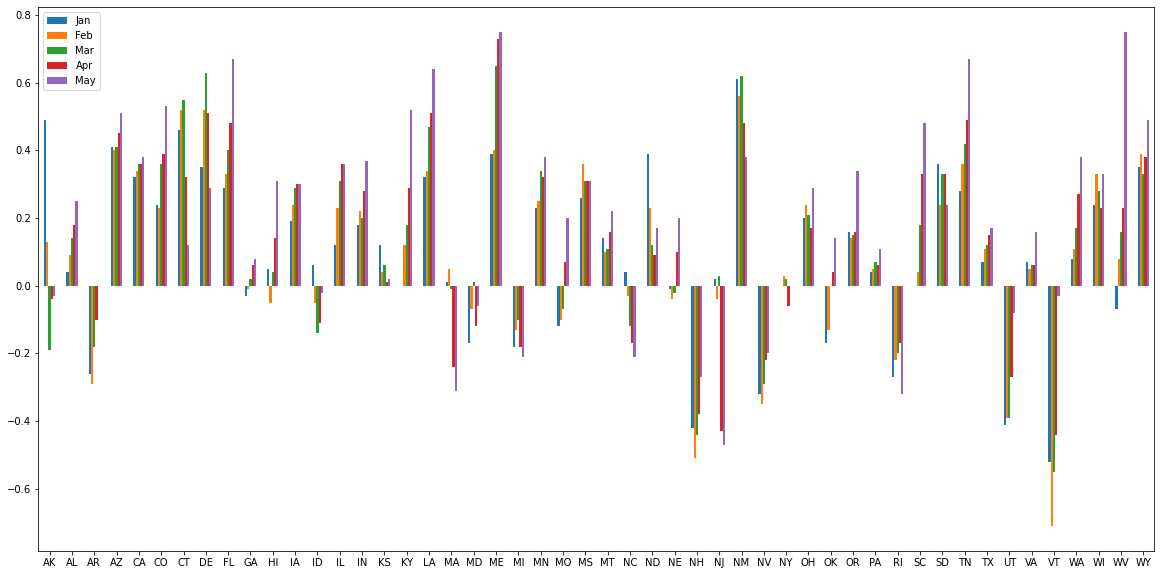

In [28]:
graph_change = pd.DataFrame({'Jan': Jan['%_dif'].tolist(),
                            'Feb': Feb['%_dif'].tolist(),
                            'Mar': Mar['%_dif'].tolist(),
                            'Apr' : Apr['%_dif'].tolist(),
                            'May' : May['%_dif'].tolist()}, index=index)
ax = graph_change.plot.bar(rot=0,figsize=(20,10))

#### Can we see a change in trends from the 3 month before//after Covid?

In [29]:
cols_to_use = ['Date','State','%_death']
od_dif = od_df[cols_to_use]
od_dif

,Date,State,%_death
0,2015-01-01,AK,3.12
1,2015-02-01,AK,3.11
2,2015-03-01,AK,3.05
3,2015-04-01,AK,3.05
4,2015-05-01,AK,2.98
...,...,...,...
3245,2020-01-01,WY,1.64
3246,2020-02-01,WY,1.67
3247,2020-03-01,WY,1.70
3248,2020-04-01,WY,1.72


In [30]:
pre_filter = od_df['Date'].isin(['2019-12-01','2020-01-01','2020-02-01'])
pre_df = od_df[pre_filter]
pre_sr = pre_df.groupby('State')['%_death'].mean()
pre_sr = pre_sr.sort_values(ascending=False)

In [31]:
mar_filter = od_df['Date'].isin(['2020-03-01'])
mar_df = od_df[mar_filter]
mar_sr = mar_df.groupby('State')['%_death'].mean()
mar_sr = mar_sr.sort_values(ascending=False)

In [32]:
apr_filter = od_df['Date'].isin(['2020-04-01'])
apr_df = od_df[apr_filter]
apr_sr = apr_df.groupby('State')['%_death'].mean()
apr_sr = apr_sr.sort_values(ascending=False)

In [33]:
may_filter = od_df['Date'].isin(['2020-03-01'])
may_df = od_df[may_filter]
may_sr = may_df.groupby('State')['%_death'].mean()
may_sr = may_sr.sort_values(ascending=False)

In [34]:
ave_4yr = od_df.groupby('State')['%_death'].mean()

In [35]:
d = {"4yr Ave": ave_4yr, "Pre": pre_sr, "Mar": mar_sr, "Apr" :apr_sr, "May" :may_sr}
final = pd.DataFrame(d)
final = final.round(decimals = 2)
final = final.transpose()
final.to_csv('../data/data_clean/od_state_rate_pre_postcov.csv')

<AxesSubplot:>

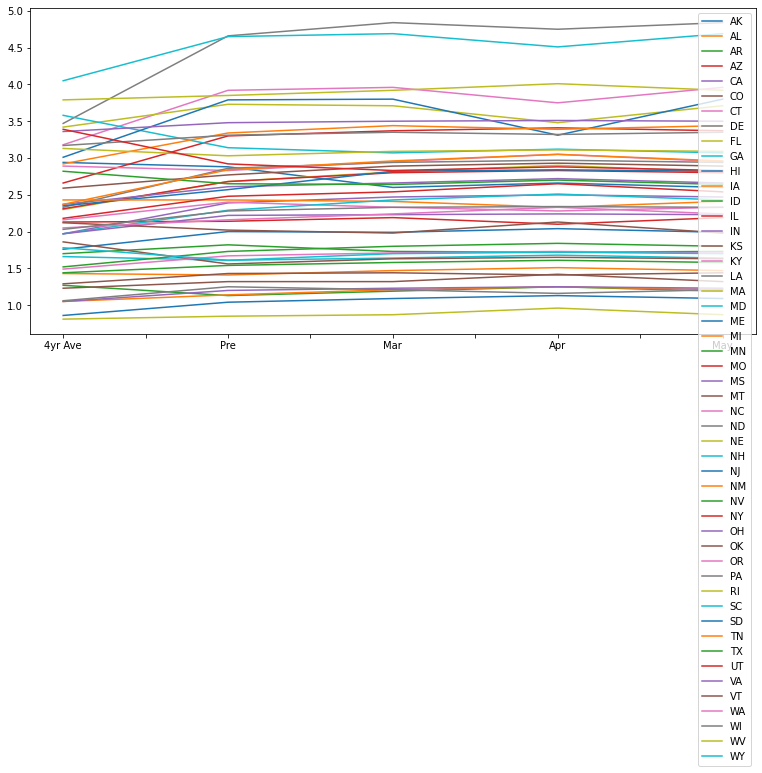

In [36]:
final.plot(kind='line',legend=True,figsize = (13,6))

There's too much going on here to see anything, so I'm goiing to condense the states' averages by time

In [37]:
nat_avg = final.sum(axis=1)/50
final['nat_avg'] = nat_avg
nat_avg_cols = ['nat_avg']
nat_avg_df = final[nat_avg_cols]

<AxesSubplot:>

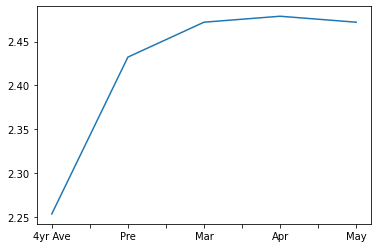

In [38]:
nat_avg.plot(kind='line')

This is a much better representation, but I think it will be more accurate to show the 'Pre' months individually; also comparing the four year average (which is a much longer span of time) isn't really helpful

In [39]:
nat_avg_df.drop(labels='4yr Ave')

,nat_avg
Pre,2.4322
Mar,2.4720
Apr,2.4788
May,2.4720


In [40]:
dec_filter = od_df['Date'].isin(['2019-12-01'])
dec_df = od_df[dec_filter]
dec_sr = dec_df.groupby('State')['%_death'].mean()
jan_filter = od_df['Date'].isin(['2020-01-01'])
jan_df = od_df[jan_filter]
jan_sr = jan_df.groupby('State')['%_death'].mean()
feb_filter = od_df['Date'].isin(['2020-02-01'])
feb_df = od_df[feb_filter]
feb_sr = feb_df.groupby('State')['%_death'].mean()

l = {"Dec":dec_sr,"Jan":jan_sr,"Feb":feb_sr, "Mar": mar_sr, "Apr" :apr_sr, "May" :may_sr}
cov_mon = pd.DataFrame(l)
cov_mon = cov_mon.transpose()
cov_mon

,AK,AL,AR,AZ,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Dec,2.94,1.39,1.12,3.24,2.37,2.74,3.86,4.57,2.63,1.60,...,1.05,2.82,1.51,2.96,2.22,2.09,2.15,2.22,3.79,1.53
Jan,2.95,1.42,1.14,3.31,2.39,2.78,3.94,4.62,2.68,1.60,...,1.05,2.83,1.54,2.92,2.23,2.05,2.16,2.28,3.85,1.64
Feb,2.75,1.43,1.14,3.34,2.42,2.79,3.96,4.80,2.73,1.63,...,1.03,2.88,1.56,2.89,2.22,1.93,2.18,2.35,3.90,1.67
Mar,2.60,1.47,1.19,3.37,2.47,2.89,3.96,4.84,2.81,1.64,...,1.09,2.96,1.58,2.83,2.23,1.98,2.24,2.33,3.92,1.70
Apr,2.66,1.51,1.25,3.41,2.50,2.93,3.75,4.75,2.90,1.68,...,1.13,3.05,1.61,2.88,2.24,2.13,2.33,2.34,4.01,1.72
May,2.60,1.47,1.19,3.37,2.47,2.89,3.96,4.84,2.81,1.64,...,1.09,2.96,1.58,2.83,2.23,1.98,2.24,2.33,3.92,1.70


In [41]:
nat_avg=cov_mon.sum(axis=1)/50
cov_mon['nat_avg'] = nat_avg
cov_mon.to_csv('../data/data_clean/od_st_rate_monthly.csv')

In [42]:
nat_cols = ['nat_avg']
cov_mon_avg = cov_mon[nat_cols]
cov_mon_avg

,nat_avg
Dec,2.4140
Jan,2.4362
Feb,2.4474
Mar,2.4720
Apr,2.4788
May,2.4720


<AxesSubplot:title={'center':'Change in the National Average Overdose Rates in the Early Months of COVID-19'}, xlabel='Month', ylabel='Percent of deaths caused by overdose'>

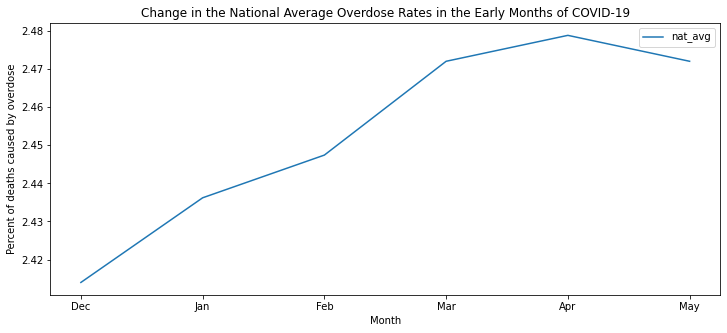

In [43]:
cov_mon_avg.plot(kind='line',xlabel='Month',ylabel='Percent of deaths caused by overdose',title='Change in the National Average Overdose Rates in the Early Months of COVID-19',figsize=(12,5))